# Duncan Michael's Report 02

In [93]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Beta
import thinkplot

Let's Solve the Elvis problem with Odds:

   This one is from David MacKay's "Information Theory, Inference, and Learning Algorithms": 
       Elvis Presley had a twin brother who died at birth.  
       What is the probability that Elvis was an identical twin?

The odds that a random twin is an identical twin are 8:92 or 2:23


The evedence is that Elvis' twin is male


In [94]:
# K is Bayes Factor
# preodds are the prior odds
K = 1/.5
preodds = 2/23

In [95]:
# postodds are the posterior odds
postodds = preodds*K
postodds


0.17391304347826086

In [96]:
def Probability(o):
    return o / (o+1)

In [97]:
Probability(postodds)

0.14814814814814817

The James-Curry problem:

Lebron James and Steph Curry are widely reguarded as the two best players currently in the NBA. In terms of probability of scoring points, who is better?

In the 2015-16 season Curry attempted 7.8 2pt shots per game and 11 3pt shots per game, making 3.8 and 4.4 respectivly.

In the same season, James attempted 15.4 2pt shots per game and 4.5 3pt shots per game, making 8.9 and 1.5 respectivly.

all other information can be found at http://www.espn.com/nba

In [98]:
# Curry's prior distributions

Curry2 = Beta(3.8,4, label = 'Curry 2pt')
Curry3 = Beta(4.4,6.6, label = 'Curry 3pt')

# James' prior distributions
James2 = Beta(8.9, 6.5, label = 'James 2pt')
James3 = Beta(1.5,3, label = 'James 3pt')

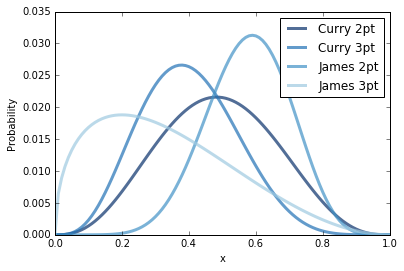

In [99]:
thinkplot.Pdf(Curry2.MakePmf())
thinkplot.Pdf(Curry3.MakePmf())
thinkplot.Pdf(James2.MakePmf())
thinkplot.Pdf(James3.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

Now let's update their distributions from the finals

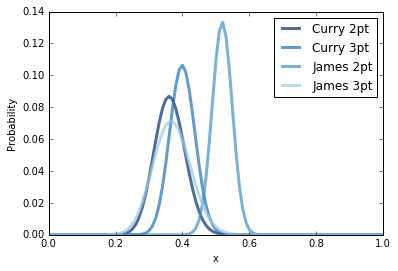

In [112]:
Curry2.Update((1,7))
Curry2.Update((3,3))
Curry2.Update((3,4))
Curry2.Update((4,8))
Curry2.Update((3,3))
Curry2.Update((2,5))
Curry2.Update((2,3))

Curry3.Update((3,5))
Curry3.Update((4,4))
Curry3.Update((3,6))
Curry3.Update((7,6))
Curry3.Update((5,10))
Curry3.Update((6,7))
Curry3.Update((4,10))

James2.Update((7,10))
James2.Update((6,6))
James2.Update((13,11))
James2.Update((9,8))
James2.Update((12,10))
James2.Update((13,8))
James2.Update((8,11))

James3.Update((2,2))
James3.Update((1,4))
James3.Update((1,1))
James3.Update((1,4))
James3.Update((4,4))
James3.Update((3,3))
James3.Update((1,4))

thinkplot.Pdf(Curry2.MakePmf())
thinkplot.Pdf(Curry3.MakePmf())
thinkplot.Pdf(James2.MakePmf())
thinkplot.Pdf(James3.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

Now we need to figure out how many shots each player is likley to take per game

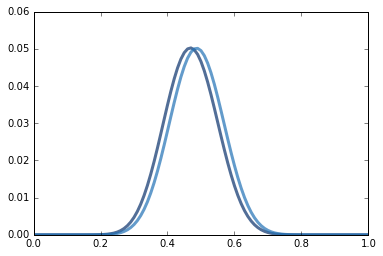

In [113]:
Cfga = Beta(18.8,21.2, label ='C')
Jfga = Beta(19.5,20.5, label ='J')

C3pa = Cfga
J3pa = Jfga
thinkplot.Pdf(Cfga.MakePmf())
thinkplot.Pdf(Jfga.MakePmf())

For these distributions, 2.5% is equivalent to one Feald Goal Attempt

How many of those attempts will be 3 pointers? Updated with the stats from the finals

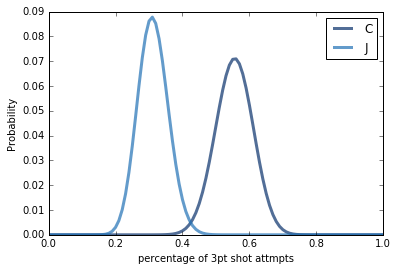

In [114]:
C3pa.Update((8,7))
C3pa.Update((8,3))
C3pa.Update((9,4))
J3pa.Update((4,17))
J3pa.Update((4,13))
J3pa.Update((5,21))
thinkplot.Pdf(Cfga.MakePmf())
thinkplot.Pdf(Jfga.MakePmf())
thinkplot.Config(xlabel='percentage of 3pt shot attmpts', ylabel='Probability')

In [118]:
def scoreaverage(nshots, sthrees, threeprob, twoprob):
    games = 10000
    shots = 0
    trythree = 0
    three = 0
    two = 0
    for _ in range(games):
        x = nshots.Random()
        x = int(round(x*100/2.5))
        shots = x
        y = sthrees.Random()
        trythree = int(round(y*shots))
        trytwo = shots - trythree
        z = threeprob.Random()
        three += int(round(z*trythree))
        a = twoprob.Random()
        two += int(round(a*trytwo))
    return (2*two+3*three)/games
    

Here are the average points scored by Curry and James

In [116]:
Curry = scoreaverage(Cfga.MakePmf(), C3pa.MakePmf(), Curry3.MakePmf(), Curry2.MakePmf())
Curry



22.0074

In [117]:
James = scoreaverage(Jfga.MakePmf(), J3pa.MakePmf(), James3.MakePmf(), James2.MakePmf())
James

13.1877